## 時間波形のplot例

### 必要な環境をインストールする

numpy: 数値計算用package
matplotlib: グラフ描画用package
pandas: csvファイルを読み込むためのpackage

このチュートリアルは説明をかねているのでjupyterを使っています.
普段pythonを動かすときは普通のpythonでも良いです(.py)

In [22]:
!pip install numpy
!pip install matplotlib
!pip install pandas

### インストールしたpackageをimportする.

pandasを使う場合, read_csv(パス)関数でcsvを読むことができる.
関数には他の引数も入れるので, 関数のapi referenceをみること.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

pandasでcsvデータの書き出しもできて, 詳細を知りたいとき"pandas ファイル出力"でググってみてください.
プログラミングをする上でネット検索できる能力は必須です.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("./5_5_4_06_time_ch1_TB58_ch2_TB54.csv")
print(df)

        Record Length         2500   Points  -1.2500001E-3  3.19999981  \
0     Sample Interval  1.000000E-6        s      -0.001249        3.12   
1       Trigger Point  1.2500002E3  Samples      -0.001248        3.12   
2                 NaN          NaN      NaN      -0.001247        3.04   
3                 NaN          NaN      NaN      -0.001246        3.20   
4                 NaN          NaN      NaN      -0.001245        3.04   
...               ...          ...      ...            ...         ...   
2494              NaN          NaN      NaN       0.001245        2.48   
2495              NaN          NaN      NaN       0.001246        2.40   
2496              NaN          NaN      NaN       0.001247        2.32   
2497              NaN          NaN      NaN       0.001248        2.32   
2498              NaN          NaN      NaN       0.001249        2.24   

      Unnamed: 5  Record Length.1       2500.1 Points.1  -1.2500001E-3.1  \
0            NaN  Sample Interval  

### csvの出力をみる

4列目(index=3)は時間, 5列目(index=4)は電圧なので,
時間, 電圧のデータをx, yにキャッシュする.

matplotlibの関数(plt.plot)を使えば, そのまま図のプロットできます.

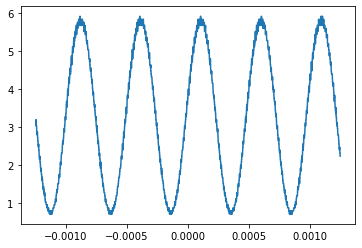

In [2]:
data = np.array(df)
x = data[:, 3]
y = data[:, 4]
plt.plot(x, y)

さっきはch1のデータです.
ch2のデータもこのファイルに書いて, 9列目(index=9)は時間, 10列目(index=10)は電圧

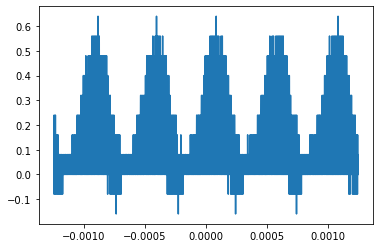

In [3]:
data = np.array(df)
x = data[:, 9]
y = data[:, 10]
plt.plot(x, y)

２つのデータを重ねてプロットしてみた.

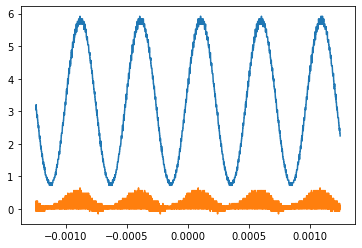

In [8]:
data = np.array(df)
x1 = data[:, 3]
y1 = data[:, 4]
x2 = data[:, 9]
y2 = data[:, 10]
plt.plot(x1, y1)
plt.plot(x2, y2)

しかし, 先ほどのデータはグラフの規範に沿っていないです.
グラフの良い例と悪い例は指導書P3~みてください.

x軸の0多いので0を減らすために, 単位をsではなくmsにする. x = x * 1000

そして以下のコードでグラフに装飾を付ける.

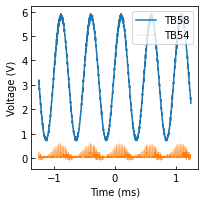

In [15]:
data = np.array(df)
x1 = data[:, 3] * 1000
y1 = data[:, 4]
x2 = data[:, 9] * 1000
y2 = data[:, 10]

fig, ax = plt.subplots(figsize=(3, 3))
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Voltage (V)")

ax.plot(x1, y1, label="TB58")
ax.plot(x2, y2, label="TB54", linewidth=0.2)
ax.legend(loc="upper right")
plt.savefig("./save.pdf")